<a href="https://colab.research.google.com/github/shhd-0/ML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# إنشاء مجلد للكاجل وتثبيت المكتبة
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # ارفع ملف kaggle.json هنا

# نقل الملف إلى مجلد kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving archive.zip to archive.zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# تثبيت kaggle إذا لم تكن مثبتة
!pip install -q kaggle

# تحميل مجموعة البيانات
!kaggle datasets download -d charlottebennett1234/lifestyle-factors-and-their-impact-on-students

# فك الضغط عن الملفات
!unzip -q /content/archive.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
replace student_lifestyle_dataset..csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np

# تحميل البيانات
df = pd.read_csv("student_lifestyle_dataset..csv")

# حذف عمود Student_ID
df.drop("Student_ID", axis=1, inplace=True)

# تحويل درجات الطلاب إلى فئات (High/Medium/Low)
def grade_class(grade):
    if grade >= 8:
        return 'High'
    elif grade >= 6:
        return 'Medium'
    else:
        return 'Low'

df['Grade_Level'] = df['Grades'].apply(grade_class)
df.drop("Grades", axis=1, inplace=True)

# تحويل القيم النصية إلى أرقام
for col in ['Stress_Level', 'Gender', 'Grade_Level']:
    df[col] = df[col].astype('category').cat.codes

# الميزات والهدف
X = df.drop("Grade_Level", axis=1).values
y = df["Grade_Level"].values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# تقسيم
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# تحويل الأهداف إلى one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# إنشاء النموذج
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 لأن عندنا 3 تصنيفات

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3693 - loss: 1.1114 - val_accuracy: 0.7536 - val_loss: 0.6924
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.6564 - val_accuracy: 0.8071 - val_loss: 0.5276
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8067 - loss: 0.5065 - val_accuracy: 0.8000 - val_loss: 0.4995
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.4797 - val_accuracy: 0.7964 - val_loss: 0.4922
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4763 - val_accuracy: 0.8000 - val_loss: 0.4819
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.4784 - val_accuracy: 0.8036 - val_loss: 0.4762
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4487 - val_accuracy: 0.8000 - val_loss: 0.4734
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4575 - val_accuracy: 0.8107 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.5120 
Test Accuracy: 77.33%


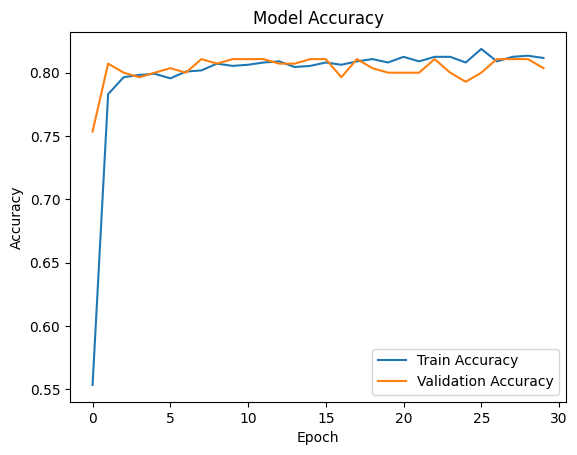

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('ann_student_model.h5')  # حفظ النموذج
